## Import modules

In [1]:
import numpy as np
import pandas as pd

from itertools import combinations

import scipy
from scipy.spatial.distance import mahalanobis
import scipy.optimize as optimize

from sklearn.linear_model import ElasticNetCV, Lasso

from base_learners.data_loading import load_data, load_from_folder
from base_learners.base_analysis import get_ate, report_ate, count_coefs, tradeoff

from visualization.ensemble_analysis_plot import overfitting_plot, ensemble_gap_plot

In [2]:
# Load the variables stored in 03 notebook
%store -r senario
%store -r T0
%store -r add
%store -r kf
%store -r control_units
%store -r sample_size
%store -r control_data
%store -r treat_data
%store -r untreat_data
%store -r initial_guess
%store -r magnitude
%store -r counterfactuals_syn
%store -r counterfactuals_mdd
%store -r counterfactuals_lasso
%store -r counterfactuals_mc

## Check current senario and $T_0$

In [3]:
print('We are currently in senario', senario, f'with T0 = {T0}')

We are currently in senario D with T0 = 24


## First-level training

In [4]:
# Synthetic Control
add_fake = np.ones((control_units - 1, 1)).T * magnitude
syn_fake = []
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    counter_syn_fake = []
                   
    for i in np.arange(control_units):
        # Shift the current control unit to the last row.
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        # Synthetic Control Method
        X_control_fake = control_temp[:-1,:T0].T
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T
        
        X_restr_fake = np.concatenate((X_control_fake, add_fake), axis=0)
        y_restr_fake = np.append(y_control_fake, magnitude)

        regr_fake = Lasso(alpha=0, max_iter=2500)
        regr_fake.fit(X_restr_fake, y_restr_fake)
        y_hat_syn_fake = regr_fake.predict(X_control_fake_predict)
        counter_syn_fake.append(y_hat_syn_fake)
        
    counter_syn_fake = np.vstack(counter_syn_fake)    
    syn_fake.append(counter_syn_fake)

1th iteration starts.
2th iteration starts.
3th iteration starts.
4th iteration starts.
5th iteration starts.
6th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

7th iteration starts.
8th iteration starts.
9th iteration starts.
10th iteration starts.
11th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

12th iteration starts.
13th iteration starts.
14th iteration starts.
15th iteration starts.
16th iteration starts.
17th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

18th iteration starts.
19th iteration starts.
20th iteration starts.
21th iteration starts.
22th iteration starts.
23th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

24th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

25th iteration starts.
26th iteration starts.
27th iteration starts.
28th iteration starts.
29th iteration starts.
30th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474

31th iteration starts.
32th iteration starts.
33th iteration starts.
34th iteration starts.
35th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474

36th iteration starts.
37th iteration starts.
38th iteration starts.
39th iteration starts.
40th iteration starts.
41th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474

42th iteration starts.
43th iteration starts.
44th iteration starts.
45th iteration starts.
46th iteration starts.
47th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

48th iteration starts.
49th iteration starts.
50th iteration starts.
51th iteration starts.
52th iteration starts.
53th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

54th iteration starts.
55th iteration starts.
56th iteration starts.
57th iteration starts.
58th iteration starts.
59th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

60th iteration starts.
61th iteration starts.
62th iteration starts.
63th iteration starts.
64th iteration starts.
65th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

66th iteration starts.
67th iteration starts.
68th iteration starts.
69th iteration starts.
70th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

71th iteration starts.
72th iteration starts.
73th iteration starts.
74th iteration starts.
75th iteration starts.
76th iteration starts.
77th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

78th iteration starts.
79th iteration starts.
80th iteration starts.
81th iteration starts.
82th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

83th iteration starts.
84th iteration starts.
85th iteration starts.
86th iteration starts.
87th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

88th iteration starts.
89th iteration starts.
90th iteration starts.
91th iteration starts.
92th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

93th iteration starts.
94th iteration starts.
95th iteration starts.
96th iteration starts.
97th iteration starts.
98th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

99th iteration starts.
100th iteration starts.


<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_fake.fit(X_restr_fake, y_restr_fake)
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-4-4b3260c9f804>:22: UserWarning: With alpha=0, this algorithm does not converge well.

In [5]:
# MDD: fake loss function
def func_loss_fake(params):
    """
    Used in the loop!
    """
    w, alpha = params
    
    return np.sum((y_control_fake - w * np.sum(control_select_fake.T, axis=1) - alpha * np.ones((T0,))) ** 2)

In [6]:
# MDD: Matching
mdd_fake=[]
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    
    distances_fake = np.zeros((control_units,control_units - 1))
    for i in np.arange(control_units):
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        X_control_fake = control_temp[:-1,:T0]
        y_control_fake = control_temp[-1,:T0]

        for j in np.arange(X_control_fake.shape[0]):
            control_unit = X_control_fake[j].reshape(1, -1)
            treat_unit = y_control_fake.reshape(1,-1)

            # Calculate the inverse of covariance matrix of two vectors.
            df_comb = pd.DataFrame(np.concatenate((control_unit, treat_unit)))
            cov = df_comb.cov()
            try:
                vi = scipy.linalg.inv(cov)
                
                # Calculate the Mahalonobis distanec.
                md = mahalanobis(control_unit.reshape(-1,), treat_unit.reshape(-1,), vi)
                distances_fake[i, j] = md
            except:
                print('Singular matrix occurs in (dataset, fake treat unit, control unit)',(sample_idx+1, i, j))



    idx_md_sort = np.argsort(distances_fake, axis=1)
    idx_five = idx_md_sort[:, :5]

    # MDD: optimazation
    # For each iteration, pick up the control unit according to the previous selection.
    mdd_fake_hat = []
    for i in np.arange(control_units):
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        X_control_fake = control_temp[:-1,:T0]
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T

        idx_select = idx_five[i,:]
        control_select_fake = X_control_fake[idx_select,:]

        # Optimization.
        result_fake = optimize.minimize(func_loss_fake, initial_guess)

        # Estimation
        y_hat_mdd_fake = result_fake.x[0] * np.sum(X_control_fake_predict[:, idx_five[i]], axis=1) + result_fake.x[1]

        mdd_fake_hat.append(y_hat_mdd_fake)
        
    counter_mdd_fake = np.vstack(mdd_fake_hat)
    mdd_fake.append(counter_mdd_fake)

1th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (1, 1, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (1, 1, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (1, 3, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (1, 6, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (1, 17, 8)
2th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 0, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 2, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 4, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 11, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 12, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 12, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (2, 13, 13)
Singular matrix occurs in (dataset, fake

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 1, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 3, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 3, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 4, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 5, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 10, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 12, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 22, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (9, 23, 2)
10th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 2, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 2, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 4, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 6, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 12, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 13, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 16, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 20, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 20, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (10, 24, 20)
11th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (11, 0, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (11, 2, 20)
Singular matrix occurs in (da

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 1, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 3, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 8, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 12, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 13, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 13, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 14, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 15, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (12, 19, 0)
13th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (13, 0, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (13, 1, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (13, 3, 4)
Singular matrix occurs in (da

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 3, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 5, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 5, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 8, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 8, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 9, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 13, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 15, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 17, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (14, 17, 22)
15th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (15, 3, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (15, 8, 11)
Singular matrix occurs in (dat

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 6, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 11, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 17, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 18, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 20, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (16, 24, 12)
17th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 0, 8)


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 1, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 1, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 1, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 5, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 5, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 6, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 9, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 10, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 10, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 13, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 15, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (17, 17, 22)
18th iteration starts.
Singular matrix occurs in (dat

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 4, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 6, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 8, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 10, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 11, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 11, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 13, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 13, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 14, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 15, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 15, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (19, 17, 22)
Singular matrix occurs in (dataset, fake treat u

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (21, 6, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (21, 9, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (21, 20, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (21, 20, 16)
22th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 1, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 2, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 4, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 4, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 4, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 8, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 9, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (22, 13, 7)
Singular matrix occurs in (datas

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 0, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 1, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 1, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 3, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 5, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 6, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 7, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 7, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 8, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 8, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 13, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (24, 15, 5)
Singular matrix occurs in (dataset, fake treat unit, c

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 0, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 2, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 2, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 5, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 7, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 8, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 8, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 10, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 16, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 18, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 19, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (25, 21, 11)
26th iteration starts.
Singular matrix occurs in (

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (28, 2, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (28, 2, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (28, 14, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (28, 17, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (28, 22, 5)
29th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 0, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 0, 8)


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 3, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 4, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 7, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 8, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 10, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 14, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 14, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 21, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (29, 23, 5)
30th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (30, 0, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (30, 3, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (30, 4, 9)
Singular matrix occurs in (dataset,

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (32, 4, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (32, 8, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (32, 9, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (32, 14, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (32, 17, 22)
33th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 0, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 4, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 7, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 8, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 9, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 10, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (33, 20, 9)
Singular matrix occurs in (da

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 2, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 3, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 4, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 5, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 8, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 12, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 16, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 17, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 19, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (38, 24, 22)
39th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (39, 3, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (39, 10, 3)
Singular matrix occurs in (da

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 0, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 4, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 9, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 12, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 16, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 22, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 22, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 23, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (40, 24, 17)
41th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (41, 17, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (41, 22, 16)
42th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 8, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 9, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 11, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 14, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 14, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 15, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 20, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (42, 22, 4)
43th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (43, 5, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (43, 10, 22)


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 1, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 8, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 10, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 13, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 14, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 15, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 16, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (44, 22, 5)
45th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 8, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 10, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 10, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 14, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 15, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 16, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 17, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 19, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (45, 24, 22)
46th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 0, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 8, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 9, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 10, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 10, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 11, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 20, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 21, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (46, 23, 3)
47th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (47, 8, 23)
48th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 0, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 6, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 7, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 10, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 13, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 18, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 20, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (48, 20, 10)
49th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (49, 1, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (49, 1, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (49, 2, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (49, 3, 19)
Singular matrix occurs in

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 1, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 2, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 3, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 3, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 6, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (50, 16, 11)
51th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 5, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 6, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 9, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 10, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 15, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (51, 20, 10)
52th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 0, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 1, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 1, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 3, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 3, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 8, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 13, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 16, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 17, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 17, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 18, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (52, 19, 23)
Singular matrix occurs in (dataset, fake treat un

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 0, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 2, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 2, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 4, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 8, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 12, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 12, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 15, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 16, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 16, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 19, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (55, 20, 2)
Singular matrix occurs in (dataset, fake treat un

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 3, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 3, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 7, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 8, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 12, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 16, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 18, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 22, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (56, 22, 7)
57th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (57, 1, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (57, 3, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (57, 5, 15)
Singular matrix occurs in (da

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 0, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 2, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 2, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 5, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 7, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 9, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 15, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 17, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (59, 20, 7)
60th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 0, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 2, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 6, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 12, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 14, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 14, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 15, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 16, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 16, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 19, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 20, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (60, 23, 12)
Singular matrix occurs in (dataset, fake treat u

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 2, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 2, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 10, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 13, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 15, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 18, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 22, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (62, 23, 21)
63th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (63, 1, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (63, 2, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (63, 5, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (63, 6, 18)
Singular matrix occurs in (d

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 3, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 4, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 8, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 10, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 13, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 16, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 16, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 19, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 19, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 19, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 21, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (64, 22, 8)
Singular matrix occurs in (dataset, fake treat u

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 4, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 16, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 17, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 20, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 21, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (66, 21, 14)
67th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (67, 6, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (67, 6, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (67, 10, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (67, 13, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (67, 15, 11)
68th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 2, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 2, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 2, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 5, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 8, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 12, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (68, 13, 16)
69th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 0, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 2, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 6, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 8, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 9, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 10, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 13, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 16, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 19, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (69, 21, 11)
70th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 1, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 3, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 3, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 4, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 4, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 4, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 6, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 18, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 18, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 18, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (70, 23, 0)
71th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 2, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 6, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 6, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 7, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 8, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 10, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 14, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 14, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 15, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (71, 20, 7)
72th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 1, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 6, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 6, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 7, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 7, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 14, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 19, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 19, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 24, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (72, 24, 21)
73th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (73, 19, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (73, 19, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (73, 21, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (73, 21, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (73, 21, 21)
74th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (74, 4, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (74, 9, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (74, 11, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (74, 23, 17)
75th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 0, 5)


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 1, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 2, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 4, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 5, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 5, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 7, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 8, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 8, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 9, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 10, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 13, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (75, 13, 18)
Singular matrix occurs in (dataset, fake treat unit, c

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 1, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 2, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 2, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 12, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 13, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 14, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 15, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 15, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 18, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 19, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 20, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (77, 20, 22)
Singular matrix occurs in (dataset, fake treat 

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 1, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 2, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 3, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 4, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 4, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 16, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 16, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 19, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 19, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (78, 24, 4)
79th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (79, 6, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (79, 9, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (79, 12, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (79, 15, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (79, 20, 22)
80th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 0, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 4, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 6, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 14, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 15, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 17, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (80, 18, 4)
Singular matrix occurs in (

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 0, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 2, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 3, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 3, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 6, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 6, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 9, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 10, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 11, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 16, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 19, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (81, 20, 5)
Singular matrix occurs in (dataset, fake treat unit,

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (85, 2, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (85, 3, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (85, 9, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (85, 19, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (85, 20, 3)
86th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 8, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 9, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 14, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 15, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 16, 3)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 16, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (86, 21, 17)
Singular matrix occurs in (d

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 0, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 2, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 5, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 7, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 11, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 12, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 16, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 18, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 22, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 23, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 23, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (87, 24, 11)
Singular matrix occurs in (dataset, fake treat u

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 1, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 1, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 4, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 7, 0)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 7, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 8, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 12, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 13, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 14, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 16, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 21, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (88, 24, 16)
89th iteration starts.
Singular matrix occurs in (d

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 3, 15)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 5, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 7, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 9, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 11, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 12, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 17, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 21, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 23, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (90, 24, 11)
91th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 2, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 2, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 3, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 5, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 7, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 8, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 9, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 14, 13)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 16, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 16, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 19, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (91, 20, 13)
Singular matrix occurs in (dataset, fake treat unit,

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 2, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 7, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 8, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 11, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 12, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 20, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 22, 6)
Singular matrix occurs in (dataset, fake treat unit, control unit) (94, 22, 21)
95th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (95, 3, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (95, 11, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (95, 11, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (95, 13, 6)
Singular matrix occurs in (

/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 0, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 1, 22)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 5, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 5, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 6, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 9, 4)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 9, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 12, 10)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 15, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 21, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (96, 24, 19)
97th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 1, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 1, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 5, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 7, 1)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 11, 17)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 15, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (97, 19, 11)
98th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (98, 15, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (98, 22, 12)
Singular matrix occurs in (dataset, fake treat unit, control unit) (98, 24, 15)
99th iteration starts.
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 0, 9)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 0, 11)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 2, 21)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 4, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 10, 20)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 11, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 14, 19)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 23, 5)
Singular matrix occurs in (dataset, fake treat unit, control unit) (99, 24, 7)
100th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/scipy/spatial/distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 7, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 12, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 13, 8)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 14, 23)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 15, 2)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 16, 18)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 18, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 19, 7)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 22, 14)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 22, 16)
Singular matrix occurs in (dataset, fake treat unit, control unit) (100, 23, 0)


In [7]:
# Lasso
lasso_fake = []
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    counter_lasso_fake = []
            
    for i in np.arange(control_units):
        # Shift the current control unit to the last row.
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        # Lasso
        X_control_fake = control_temp[:-1,:T0].T
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T

        regr_fake = ElasticNetCV(l1_ratio=1, cv=kf, max_iter=2500)
        regr_fake.fit(X_control_fake, y_control_fake)
        y_hat_lasso_fake = regr_fake.predict(X_control_fake_predict)
        counter_lasso_fake.append(y_hat_lasso_fake)
        
    counter_lasso_fake = np.vstack(counter_lasso_fake)
    lasso_fake.append(counter_lasso_fake)

1th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011714054921934114, tolerance: 0.010233626935483985
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005541497108492777, tolerance: 0.005471114856120695
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008453186729922901, tolerance: 0.005471114856120695
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

2th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018483460114254946, tolerance: 0.007451150085006943
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007179717130777197, tolerance: 0.006652462193139366
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007377943415449284, tolerance: 0.006652462193139366
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

3th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01605637396979248, tolerance: 0.007181747600768552
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015202676625902356, tolerance: 0.007181747600768552
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004948768643637715, tolerance: 0.004679015014053548
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

4th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009573465771147566, tolerance: 0.008442927322324054
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01112722343335193, tolerance: 0.010111132547975783
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006009515833770296, tolerance: 0.0057598445576895006
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

5th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013507501465664484, tolerance: 0.00753097649893154
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012761453719402183, tolerance: 0.00753097649893154
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012061998359898074, tolerance: 0.00753097649893154
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

6th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007574411464938313, tolerance: 0.00437627827604867
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0164868892291008, tolerance: 0.00437627827604867
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010112444934738951, tolerance: 0.008671561092731084
  model = cd_fast.enet_coordinate_descent(


7th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008846845352479094, tolerance: 0.006794352476450232
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009274936668446254, tolerance: 0.006794352476450232
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01077669482332727, tolerance: 0.006794352476450232
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

8th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01317743217459949, tolerance: 0.008585080943690142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009959105851403305, tolerance: 0.008585080943690142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00909875645888536, tolerance: 0.0063226334718475075
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012871004222109406, tolerance: 0.006936930877801001
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007310906643189341, tolerance: 0.005236090717117158
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010958244267329165, tolerance: 0.007605123054225186
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

9th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039708313808317186, tolerance: 0.010711526830864125
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00583154410923542, tolerance: 0.005589564266650337
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009587795412074218, tolerance: 0.005591310809250975
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

10th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005372471196328839, tolerance: 0.005287840681520378
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005615327861946864, tolerance: 0.005287840681520378
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005327712866126034, tolerance: 0.005287840681520378
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

11th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007247890442513061, tolerance: 0.0072006530013588605
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0072747286082601725, tolerance: 0.0072006530013588605
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007245412106887006, tolerance: 0.0072006530013588605
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/skle

12th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013050325471348323, tolerance: 0.009881681091946535
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017207127160380642, tolerance: 0.012853939202188903
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016122339753229298, tolerance: 0.012853939202188903
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012542957850607328, tolerance: 0.011055192621311124
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021774293310303783, tolerance: 0.011163769698916661
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020422753127565363, tolerance: 0.011163769698916661
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

13th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015137153619973809, tolerance: 0.010957474777265844
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010026997815701932, tolerance: 0.007888090145864208
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011816893167406639, tolerance: 0.010887812890238671
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

14th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011998942170258875, tolerance: 0.00897836407652424
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01360009521316502, tolerance: 0.00897836407652424
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02586798099014076, tolerance: 0.009476493877347957
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/line

15th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01746556902766061, tolerance: 0.011337556335396539
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011172218957813507, tolerance: 0.010811768447238012
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022415928305011712, tolerance: 0.011159787928995142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

16th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006851333658840941, tolerance: 0.003944639148373741
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007958141683738873, tolerance: 0.003944639148373741
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007555432249628957, tolerance: 0.003944639148373741
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

17th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006888074098131525, tolerance: 0.005942141427902192
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024603507217163312, tolerance: 0.01330427503129926
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.042709455877156355, tolerance: 0.01330427503129926
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

18th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021243033007643186, tolerance: 0.008348424382179122
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01205245285876777, tolerance: 0.008348424382179122
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014703021561971508, tolerance: 0.011485588621076546
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

19th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017794656238485196, tolerance: 0.010477687044839973
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02052243743808635, tolerance: 0.010477687044839973
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009358611126283622, tolerance: 0.008717571431957194
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

20th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004663912535909143, tolerance: 0.004625873670930972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007836360640929518, tolerance: 0.006120387069558237
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020426823471638267, tolerance: 0.006120387069558237
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

21th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010654361774457666, tolerance: 0.008815376442736004
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03003994570546764, tolerance: 0.012674258596599272
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028815157281947945, tolerance: 0.012674258596599272
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

22th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00791164459665461, tolerance: 0.006575959831336358
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010691710871737148, tolerance: 0.006575959831336358
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011696130554644413, tolerance: 0.006575959831336358
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

23th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01599615465367865, tolerance: 0.010560836319239776
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014893664134402185, tolerance: 0.010560836319239776
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012358560140485975, tolerance: 0.006552468115889354
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

24th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004839469004046748, tolerance: 0.0038635305532210497
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027725342342781012, tolerance: 0.009981623954883239
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020854030152317238, tolerance: 0.009981623954883239
  model = cd_fast.enet_coordinate_descent(


25th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005627506420917555, tolerance: 0.005432884277035665
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010828786930039414, tolerance: 0.008299482829156647
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011449697720427476, tolerance: 0.008288013743573228
  model = cd_fast.enet_coordinate_descent(


26th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005397680114518022, tolerance: 0.005233055720505118
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007955894504011574, tolerance: 0.005233055720505118
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00970212002644194, tolerance: 0.005233055720505118
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

27th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00938668610627158, tolerance: 0.0068582092238870344
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016369829443468542, tolerance: 0.007765695223812783
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022321729421443726, tolerance: 0.007765695223812783
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

28th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010368631915439241, tolerance: 0.007355061610342132
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016525834258512395, tolerance: 0.007355061610342132
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00974671570395974, tolerance: 0.008761534348478602
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01658083540398242, tolerance: 0.012493536076626382
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015265897073964751, tolerance: 0.012493536076626382
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004941069058029157, tolerance: 0.004392349784711536
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

29th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013218656401835727, tolerance: 0.011206357058654418
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013732579958769975, tolerance: 0.011206357058654418
  model = cd_fast.enet_coordinate_descent(


30th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005938677205299836, tolerance: 0.004262873613497896
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01023427335098459, tolerance: 0.00931302630993059
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015618425109547085, tolerance: 0.00931302630993059
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

31th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010137432445938344, tolerance: 0.008826002146426365
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016049148396851898, tolerance: 0.00936059154879263
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015026638409444737, tolerance: 0.00936059154879263
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00695762065780503, tolerance: 0.005840297968045452
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007736397925278027, tolerance: 0.005840297968045452
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007528418232206402, tolerance: 0.005840297968045452
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

32th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014127838030469075, tolerance: 0.012672128105879197
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010369924558182836, tolerance: 0.010043460942320129
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010256461098395175, tolerance: 0.010043460942320129
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

33th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009508623874912747, tolerance: 0.007055095457870553
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012548632660168035, tolerance: 0.010606815178283739
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011836746211803195, tolerance: 0.009165289911699548
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

34th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010235686671306199, tolerance: 0.00924551595978905
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010468711701476063, tolerance: 0.00924551595978905
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010302530546073718, tolerance: 0.00924551595978905
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

35th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022109662844890243, tolerance: 0.013221469000669447
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021644036364059538, tolerance: 0.013221469000669447
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012962234588937666, tolerance: 0.008451769243307674
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

36th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013759603220242944, tolerance: 0.005777081955622719
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01820982430939666, tolerance: 0.015362378571478895
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011177439059826696, tolerance: 0.007960364106855057
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009488090754885395, tolerance: 0.008570741610088396
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012560061432697722, tolerance: 0.011449658201745929
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01285535669713933, tolerance: 0.011449658201745929
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

37th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009476064395871564, tolerance: 0.0063020464760737
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008186579727496202, tolerance: 0.006906176477409039
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008364485640983521, tolerance: 0.006906176477409039
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

38th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008971585377675506, tolerance: 0.007946649599664376
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007575101936238837, tolerance: 0.00535512242411393
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006548722863008644, tolerance: 0.00535512242411393
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

39th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049759795541382545, tolerance: 0.003633150934507972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005683438087875664, tolerance: 0.003633150934507972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01000213823728685, tolerance: 0.003633150934507972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

40th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016873613301305213, tolerance: 0.013974200595576327
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024441804841002224, tolerance: 0.013974200595576327
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023286602096898257, tolerance: 0.013974200595576327
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

41th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006775845393394486, tolerance: 0.006180381965661759
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006459499223481657, tolerance: 0.006180381965661759
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00948610282683282, tolerance: 0.008689213732431297
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

42th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044749264721752335, tolerance: 0.0042427870322793776
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063170297049108814, tolerance: 0.0042427870322793776
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00893799098886483, tolerance: 0.008211167285280497
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklea

43th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013929097379797195, tolerance: 0.012486135310245304
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019172876508066317, tolerance: 0.012486135310245304
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031197244540793312, tolerance: 0.012486135310245304
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004795300013169912, tolerance: 0.004749855114982084
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010892998342699994, tolerance: 0.009743250749554809
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014285527816441268, tolerance: 0.009743250749554809
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

44th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010676956165831086, tolerance: 0.005921467222632695
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0170057649312636, tolerance: 0.008257188651038843
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007771197609086455, tolerance: 0.0048200474528420694
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

45th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008384845016842668, tolerance: 0.007841203751518274
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011330917399814844, tolerance: 0.0076277023414648044
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005499243144358276, tolerance: 0.0054226331424227295
  model = cd_fast.enet_coordinate_descent(


46th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00919711448519589, tolerance: 0.007270240658555682
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010531730610541579, tolerance: 0.01005062245068511
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020807780108215823, tolerance: 0.010830153568328624
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

47th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015655217146410827, tolerance: 0.010201332408581787
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025078851841802585, tolerance: 0.010201332408581787
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0274298577686507, tolerance: 0.010201332408581787
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

48th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012304504342762701, tolerance: 0.011907842255188518
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01904341645918342, tolerance: 0.011907842255188518
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0177572766632354, tolerance: 0.011907842255188518
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010320487485509622, tolerance: 0.008619650742197015
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009081738331391864, tolerance: 0.008619650742197015
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024583847963320915, tolerance: 0.015041246896959183
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

49th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035856036151238335, tolerance: 0.009977787946947939
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04044721135026652, tolerance: 0.009977787946947939
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04159138825592823, tolerance: 0.009977787946947939
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013532376034068316, tolerance: 0.010333030648314083
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017957678506706598, tolerance: 0.010333030648314083
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00637759115434533, tolerance: 0.00590634865685375
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

50th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00809965547680136, tolerance: 0.0037719648399492365
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012418173146397926, tolerance: 0.004164185596613334
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004598106064799934, tolerance: 0.004164185596613334
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

51th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00706599266148622, tolerance: 0.006717048770218685
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02530535796477551, tolerance: 0.014469777576569861
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.046023672123264525, tolerance: 0.014469777576569861
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

52th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01282930582344638, tolerance: 0.007983628129805267
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021952980232765373, tolerance: 0.008464187678002002
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013393391324914572, tolerance: 0.009818759265764903
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

53th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02681980753812563, tolerance: 0.013859677448686523
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018529678606291178, tolerance: 0.013859677448686523
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023956569866263044, tolerance: 0.013859677448686523
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

54th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.058933207899478424, tolerance: 0.008979530977585966
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015463628187821099, tolerance: 0.008979530977585966
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009436809033597449, tolerance: 0.008979530977585966
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010489277201358366, tolerance: 0.007973824618144786
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010470384944022998, tolerance: 0.007973824618144786
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010080457339009946, tolerance: 0.007973824618144786
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

55th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012988331397595587, tolerance: 0.008335441035509502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01351204767340014, tolerance: 0.008335441035509502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012718638557536077, tolerance: 0.008335441035509502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

56th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014278673470555558, tolerance: 0.009721681972198092
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015854085219475067, tolerance: 0.009721681972198092
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015897680205383402, tolerance: 0.009721681972198092
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

57th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007170418465377415, tolerance: 0.006091115570056139
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007477301941639869, tolerance: 0.006091115570056139
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007329958083088506, tolerance: 0.006091115570056139
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

58th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005196570010470358, tolerance: 0.00494692518762416
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01962854530468361, tolerance: 0.01473994110526287
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010179361523011687, tolerance: 0.007119139390651904
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

59th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017362778226953646, tolerance: 0.007551186893926142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007677168046826999, tolerance: 0.007031326334780018
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01133701084056793, tolerance: 0.00695382733063885
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

60th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012258724713664071, tolerance: 0.008732632101239889
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00849363554214011, tolerance: 0.006071280313905648
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018568247203949673, tolerance: 0.006071280313905648
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

61th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00840346293327432, tolerance: 0.005312766835906561
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00620479236971494, tolerance: 0.005312766835906561
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010002756691536607, tolerance: 0.005312766835906561
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

62th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010853501771122875, tolerance: 0.010103250158304525
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006374495400672142, tolerance: 0.0059636564859772345
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018804737833539864, tolerance: 0.008610365167749746
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn

63th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009898972990026289, tolerance: 0.008004063611864079
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010293157909071593, tolerance: 0.008004063611864079
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0076187064933196935, tolerance: 0.005938868312867569
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn

64th iteration starts.
65th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016047473052727357, tolerance: 0.008171361545250035
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02730825439135076, tolerance: 0.008171361545250035
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025643409890206526, tolerance: 0.008171361545250035
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

66th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013836481252440858, tolerance: 0.010617932410066878
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013571255174826824, tolerance: 0.010617932410066878
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012840422112942201, tolerance: 0.010617932410066878
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

67th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011811842077466828, tolerance: 0.010056709728903589
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013113524318029202, tolerance: 0.010056709728903589
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013846971071759945, tolerance: 0.010056709728903589
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

68th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015290027319973531, tolerance: 0.009727030842638294
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022858596665153552, tolerance: 0.009727030842638294
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016809561785570026, tolerance: 0.005449980897862307
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

69th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007385295192641972, tolerance: 0.0070212665798942584
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03172175455164861, tolerance: 0.0070212665798942584
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04177372304630789, tolerance: 0.012992620613615469
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

70th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009792776540991553, tolerance: 0.007890873287469895
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009080416314257614, tolerance: 0.007890873287469895
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008422868849047346, tolerance: 0.007890873287469895
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

71th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00715408439127907, tolerance: 0.006056043102753838
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008612980542091586, tolerance: 0.006959635893767791
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006316540214242439, tolerance: 0.004995722365571261
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

72th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013085826042573245, tolerance: 0.007721973028112084
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01227432301895881, tolerance: 0.007721973028112084
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017866741282157594, tolerance: 0.01077163430645627
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

73th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005201911834838313, tolerance: 0.004765087775410708
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009649498201312223, tolerance: 0.009342792583523753
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009348466634841318, tolerance: 0.009342792583523753
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

74th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0056922171318832815, tolerance: 0.004629663808670087
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051223381693746295, tolerance: 0.004629663808670087
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006566289630258626, tolerance: 0.004629663808670087
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklear

75th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010934735173706578, tolerance: 0.009608176956051739
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018140802458222582, tolerance: 0.010683320257562298
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021838508227222664, tolerance: 0.010683320257562298
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

76th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014337439805454155, tolerance: 0.008079438274398637
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013487832642077646, tolerance: 0.008079438274398637
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012680287391820033, tolerance: 0.008079438274398637
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

77th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025980514068368876, tolerance: 0.01987412879551818
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027009700646311696, tolerance: 0.01987412879551818
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02620534049206924, tolerance: 0.01987412879551818
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/line

78th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00529916616660156, tolerance: 0.004414965402882408
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008216827652722358, tolerance: 0.007105488518468581
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008310105591961825, tolerance: 0.007105488518468581
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

79th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07790078148276303, tolerance: 0.009567718198948484
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07345848363060092, tolerance: 0.009567718198948484
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06955498168701602, tolerance: 0.009567718198948484
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

80th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013983325004691682, tolerance: 0.011575497925947857
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01330835241626982, tolerance: 0.011575497925947857
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012482559696463502, tolerance: 0.011575497925947857
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

81th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014958319369002382, tolerance: 0.010013595716146087
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010014112207037431, tolerance: 0.008994674274749306
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02008063919041625, tolerance: 0.01467104524410863
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

82th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006774593152006542, tolerance: 0.0065952881166700195
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014984650336020588, tolerance: 0.00787791603915028
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014074789845252345, tolerance: 0.00787791603915028
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

83th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012207985851309555, tolerance: 0.004577211209726662
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006507884044713141, tolerance: 0.0043136045029148135
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011472741346724824, tolerance: 0.006728640709020901
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0103195873962183, tolerance: 0.005326782579224634
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014771055273106959, tolerance: 0.005326782579224634
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00885984883361346, tolerance: 0.005326782579224634
  model = cd_fast.enet_coordinate_descent(


84th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02457784548528613, tolerance: 0.015870528313236952
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03743669701047925, tolerance: 0.015870528313236952
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044398687278092944, tolerance: 0.015870528313236952
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048001755420994385, tolerance: 0.00474369259233832
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036264355183275754, tolerance: 0.012654993112003982
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0174827651740328, tolerance: 0.012654993112003982
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

85th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051508629899641445, tolerance: 0.0051115352580122205
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01993719873563149, tolerance: 0.0051115352580122205
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018867969264639295, tolerance: 0.0051115352580122205
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklea

86th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011848617606462275, tolerance: 0.008220315915260356
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011939838810769765, tolerance: 0.008220315915260356
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011394479686299253, tolerance: 0.008220315915260356
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

87th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038275001122271, tolerance: 0.009195595114305562
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038837154214153013, tolerance: 0.009195595114305562
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036341878243716375, tolerance: 0.009195595114305562
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011544790783649561, tolerance: 0.006514174145367628
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014529539571398742, tolerance: 0.006514174145367628
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013653464261731751, tolerance: 0.006514174145367628
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

88th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019260006646019123, tolerance: 0.008620757193702517
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01896998926062965, tolerance: 0.008620757193702517
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017279838783670565, tolerance: 0.008620757193702517
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01427508693035573, tolerance: 0.010959394072354684
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013335084709394929, tolerance: 0.010959394072354684
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012455558134670253, tolerance: 0.010959394072354684
  model = cd_fast.enet_coordinate_descent(


89th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02041597837553155, tolerance: 0.008286323160837735
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03444689551656532, tolerance: 0.008286323160837735
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03774704183001587, tolerance: 0.008286323160837735
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/lin

90th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004500108096080008, tolerance: 0.0035501071192114296
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005830127426224463, tolerance: 0.0035501071192114296
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062102355790981945, tolerance: 0.0035501071192114296
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/skle

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0076496019718337305, tolerance: 0.006626472592229972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008231257396367181, tolerance: 0.006626472592229972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008364775662326102, tolerance: 0.006626472592229972
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn

91th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008893273569142268, tolerance: 0.006570810790414376
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009672162593598488, tolerance: 0.006570810790414376
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00958042620595273, tolerance: 0.006570810790414376
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016055915559241463, tolerance: 0.0077471034564162
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016082165872186138, tolerance: 0.0077471034564162
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008086492016302405, tolerance: 0.0077471034564162
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear

92th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043958390273025394, tolerance: 0.006449274363876502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03573954889878195, tolerance: 0.006449274363876502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03604698300805609, tolerance: 0.006449274363876502
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011469041607348185, tolerance: 0.01016726233088477
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010683693784435566, tolerance: 0.010415262511652496
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011079760013133155, tolerance: 0.007731586951768079
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

93th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010216979315586239, tolerance: 0.008145549231823142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009569241547345508, tolerance: 0.008145549231823142
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011765625166348492, tolerance: 0.006448733162109089
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

94th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010162437992110807, tolerance: 0.00951166316893719
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06140151638332636, tolerance: 0.00951166316893719
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06152439100890894, tolerance: 0.00951166316893719
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linea

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012669654778547201, tolerance: 0.010200276167282897
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010151403117855562, tolerance: 0.008863771413827114
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009673528874942328, tolerance: 0.008863771413827114
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/

95th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01025574150966524, tolerance: 0.008276105705979794
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011227154909096537, tolerance: 0.008276105705979794
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011132834322635704, tolerance: 0.008276105705979794
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

96th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015049283021725923, tolerance: 0.01027168345655676
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02378215755814761, tolerance: 0.00883566868459438
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023391140683997058, tolerance: 0.00883566868459438
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/line

97th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011014193677565176, tolerance: 0.009078127666225535
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01541667495347454, tolerance: 0.01132293799262796
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02366872522501806, tolerance: 0.01132293799262796
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/line

98th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013177976979183992, tolerance: 0.008042371595369522
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022894522175294973, tolerance: 0.008042371595369522
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01082032187469395, tolerance: 0.009111129308014622
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/l

99th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00700657708070207, tolerance: 0.005096878723330393
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006730909663926088, tolerance: 0.00659641463284741
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009715733608131938, tolerance: 0.005915144803451835
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

100th iteration starts.


/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02193084667183376, tolerance: 0.008663358955570908
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02115468801197129, tolerance: 0.008663358955570908
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023802982860803512, tolerance: 0.008663358955570908
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/li

In [8]:
# WOC Method
# Already available in 04 notebook
path_mc_temp = 'meta_learner/ensemble_mc/'

mc_fake = []
for sample_idx in np.arange(sample_size):
    mc_fake_hat = pd.read_csv(path_mc_temp + 'mc_hat_temp_{}.csv'.format(sample_idx + 1)).values
    mc_fake.append(mc_fake_hat)

## Second-level training: meta-learner

### With nonnegative constraint?

In [9]:
nonnegative = True  # True or False

### Three functions for optimization

In [10]:
def func_ensemb_2(params):
    """
    Used only in the loop!
    """
    theta1, theta2 = params
    method1, method2 = individual_keys_2    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2]) ** 2), axis=1))

In [11]:
def func_ensemb_3(params):
    """
    Used only in the loop!
    """
    theta1, theta2, theta3 = params
    method1, method2, method3 = individual_keys_3    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2] - theta3 * individual_pred_new[method3]) ** 2), axis=1))

In [12]:
def func_ensemb_4(params):
    """
    Used only in the loop!
    """
    theta1, theta2, theta3, theta4 = params
    method1, method2, method3, method4 = individual_keys_4
    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2] - theta3 * individual_pred_new[method3] - theta4 * individual_pred_new[method4]) ** 2), axis=1))

In [13]:
add_transpose = add.T

method_vars = [syn_fake, mdd_fake, mc_fake, lasso_fake]
analysis_dict = {}
counter_en_dict = {}
for sample in np.arange(sample_size):
    # True outcomes of test control unit (imaginary treat unit).
    control_sample_true = control_data[sample].values[:,T0:]
    
    # Add sum-to-one constraint.
    control_true_new = np.concatenate((control_sample_true, add_transpose), axis=1)
    
    # Some useful dictionaries to store predictions for treat unit and control units,in each dataset. 
    sample_dict = {'syn': syn_fake[sample], 'mdd': mdd_fake[sample], 'mc': mc_fake[sample], 'lasso': lasso_fake[sample]}
    counter_dict = {'syn': counterfactuals_syn[sample], 
                    'mdd': counterfactuals_mdd[sample], 
                    'mc': counterfactuals_mc[sample], 
                    'lasso': counterfactuals_lasso[sample]}
    
    # Outcomes for true treated unit.
    untreat_iter_true = untreat_data[sample].values.reshape(-1,)[T0:]
    
    # In-sample mse in control group.
    in_mse_syn = np.mean((control_sample_true - sample_dict['syn']) ** 2)
    in_mse_mdd = np.mean((control_sample_true - sample_dict['mdd']) ** 2)
    in_mse_mc = np.mean((control_sample_true - sample_dict['mc']) ** 2)
    in_mse_lasso = np.mean((control_sample_true - sample_dict['lasso']) ** 2)
    
    print('')
    print('In-sample {}:'.format(sample + 1))
    print('MSE of SC:', in_mse_syn)
    print('MSE of MDD:', in_mse_mdd)
    print('MSE of MC:', in_mse_mc)
    print('MSE of LASSO:', in_mse_lasso)
    print('')
    
    # Start to stacking first-level results.
    print('Out of sample {}:'.format(sample + 1))    
    analysis_dict[f'{sample + 1}'] = {'Individual Out-of-Sample': {}, 'Ensemble Out-of-Sample': {}, 
                                      'Individual In-Sample': {'syn': in_mse_syn,
                                                              'mdd': in_mse_mdd,
                                                              'mc': in_mse_mc,
                                                              'lasso': in_mse_lasso}}
    counter_en_dict[f'{sample + 1}'] = {}
    # For each possible combination of base learner:
    for power in np.arange(len(sample_dict)) + 1:
        for methods_comb in combinations(sample_dict.keys(), power):
            #print(methods_comb)
            number_methods = len(methods_comb)
            
            # Add sum-to-one constraint.
            individual_pred_new = {}
            for individual_pred in methods_comb:
                individual_pred_new[individual_pred] = np.concatenate((sample_dict[individual_pred], add_transpose), axis=1)
                
            # Stacked regression estimation for each possible combination:
            len_individuals = len(individual_pred_new)
            if len_individuals == 1:
                individual_keys_1 = list(individual_pred_new.keys())
                print(individual_keys_1)
                mse = np.mean((untreat_iter_true - counter_dict[individual_keys_1[0]]) ** 2)
                print(mse)
                
                # Recording the results.
                analysis_dict[f'{sample + 1}']['Individual Out-of-Sample'][individual_keys_1[0]] = mse
                
            elif len_individuals == 2:
                individual_keys_2 = list(individual_pred_new.keys())
                print(individual_keys_2)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100})
                initial_guess_ensemb = [0.5, 0.5]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_2, initial_guess_ensemb, method='SLSQP',constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_2, initial_guess_ensemb, method='Nelder-Mead')
                
                # Report optimization results.                         
                print(results_ensemb.x)
                coefs_ensemb = {}
                coefs_ensemb[individual_keys_2[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_2[1]] = results_ensemb.x[1]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_2[0]] * counter_dict[individual_keys_2[0]] + coefs_ensemb[individual_keys_2[1]] * counter_dict[individual_keys_2[1]]                
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)                
                
                # Recording
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_2)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_2)] = counterfactuals_ensemble
                
            elif len_individuals == 3:
                individual_keys_3 = list(individual_pred_new.keys())
                print(individual_keys_3)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[2] - 1e-100})
                initial_guess_ensemb = [0.3, 0.3, 0.4]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_3, initial_guess_ensemb, method='SLSQP', constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_3, initial_guess_ensemb, method='Nelder-Mead')
                
                # Report optimization results.
                print(results_ensemb.x)
                coefs_ensemb = {}
                coefs_ensemb[individual_keys_3[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_3[1]] = results_ensemb.x[1]
                coefs_ensemb[individual_keys_3[2]] = results_ensemb.x[2]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_3[0]] * counter_dict[individual_keys_3[0]] + coefs_ensemb[individual_keys_3[1]] * counter_dict[individual_keys_3[1]] + coefs_ensemb[individual_keys_3[2]] * counter_dict[individual_keys_3[2]]
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)
                
                # Recording.
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_3)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_3)] = counterfactuals_ensemble
                
            else:
                individual_keys_4 = list(individual_pred_new.keys())
                print(individual_keys_4)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[2] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[3] - 1e-100})
                initial_guess_ensemb = [0.4, 0.1, 0.1, 0.4]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_4, initial_guess_ensemb, method='SLSQP', constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_4, initial_guess_ensemb, method='Nelder-Mead')

                # Report optimization results.
                print(results_ensemb.x)
                coefs_ensemb[individual_keys_4[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_4[1]] = results_ensemb.x[1]
                coefs_ensemb[individual_keys_4[2]] = results_ensemb.x[2]
                coefs_ensemb[individual_keys_4[3]] = results_ensemb.x[3]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_4[0]] * counter_dict[individual_keys_4[0]] + coefs_ensemb[individual_keys_4[1]] * counter_dict[individual_keys_4[1]] + coefs_ensemb[individual_keys_4[2]] * counter_dict[individual_keys_4[2]] + coefs_ensemb[individual_keys_4[3]] * counter_dict[individual_keys_4[3]]
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)               
                
                # Recording.
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_4)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_4)] = counterfactuals_ensemble


In-sample 1:
MSE of SC: 3.4825947611801924
MSE of MDD: 2.4934999026418243
MSE of MC: 2.081900374031427
MSE of LASSO: 2.85756635363616

Out of sample 1:
['syn']
0.7744374982786013
['mdd']
2.657261617324294
['mc']
1.9255675324021333
['lasso']
0.5346156144115218
['syn', 'mdd']
[0.5 0.5]
0.9795486936118638
['syn', 'mc']
[0.5 0.5]
1.034485550330247
['syn', 'lasso']
[0.5 0.5]
0.5418010078665857
['mdd', 'mc']
[0.5 0.5]
2.0134786682012455
['mdd', 'lasso']
[0.5 0.5]
1.2319216879560633
['mc', 'lasso']
[0.5 0.5]
1.011391815415266
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.2498110771705224
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.7494512846036073
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.7511775213519508
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.2089340630831564
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.6371168630400438

In-sample 2:
MSE of SC: 3.2637951571279205
MSE of MDD: 2.3924547588613883
MSE of MC: 1.6458465421551767
MSE of LASSO: 2.8355285948069096

Out of sample 2:
['syn']
0.5949337585327206
[

[0.5 0.5]
1.3750501658014647
['syn', 'lasso']
[0.5 0.5]
2.0031751258236286
['mdd', 'mc']
[0.5 0.5]
1.4340705598257628
['mdd', 'lasso']
[0.5 0.5]
1.8045091047364659
['mc', 'lasso']
[0.5 0.5]
1.190760146601758
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.4521710773893364
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.885301780046495
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.440286595416155
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.4463810210875232
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.7796778254138204

In-sample 14:
MSE of SC: 3.3547944198319124
MSE of MDD: 2.323305378209275
MSE of MC: 1.7054248958020193
MSE of LASSO: 2.5734206845527554

Out of sample 14:
['syn']
1.8678439277321324
['mdd']
1.161860828200232
['mc']
0.893238445989961
['lasso']
1.1131986269644356
['syn', 'mdd']
[0.5 0.5]
0.974248497819645
['syn', 'mc']
[0.5 0.5]
1.0400184086118058
['syn', 'lasso']
[0.5 0.5]
1.1573587398610556
['mdd', 'mc']
[0.5 0.5]
0.938963846621896
['mdd', 'lasso']
[0.5 0.5]
0.8009093340052286
['mc', 'lasso']
[0.5

[0.5 0.5]
2.637480750042359
['mc', 'lasso']
[0.5 0.5]
1.5415674223816866
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.7510014270640202
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
2.0291202639490034
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.4614603015009588
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
2.118982360081907
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.7273371277230831

In-sample 26:
MSE of SC: 3.734613256556784
MSE of MDD: 2.188091974063658
MSE of MC: 1.7877493520640337
MSE of LASSO: 2.654019318371755

Out of sample 26:
['syn']
0.7763970921361691
['mdd']
2.1094809420706233
['mc']
1.6409567826766274
['lasso']
1.5711186622152902
['syn', 'mdd']
[0.5 0.5]
0.7084781754596957
['syn', 'mc']
[0.5 0.5]
0.5443962118023794
['syn', 'lasso']
[0.5 0.5]
0.4055236468700885
['mdd', 'mc']
[0.5 0.5]
1.8197378256451813
['mdd', 'lasso']
[0.5 0.5]
1.7056840891216343
['mc', 'lasso']
[0.5 0.5]
1.5079400852890525
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.9122545599257607
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.7964369856884

[0.5 0.5]
0.8863350776129111
['mdd', 'mc']
[0.5 0.5]
2.301939443756912
['mdd', 'lasso']
[0.5 0.5]
1.7487616130589612
['mc', 'lasso']
[0.5 0.5]
0.9297803602900642
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.3819162200153114
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.1480309522832501
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.8011347415365891
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.440848944390691
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.903102933876204

In-sample 38:
MSE of SC: 3.6641238599276424
MSE of MDD: 2.560407595728366
MSE of MC: 2.2350971000954436
MSE of LASSO: 3.345565336736086

Out of sample 38:
['syn']
1.909354258840649
['mdd']
3.7921235005537
['mc']
2.2271311370299616
['lasso']
2.702340756019865
['syn', 'mdd']
[0.5 0.5]
2.202512014552609
['syn', 'mc']
[0.5 0.5]
1.9136647997239928
['syn', 'lasso']
[0.5 0.5]
1.8648875335187372
['mdd', 'mc']
[0.5 0.5]
2.801911065595915
['mdd', 'lasso']
[0.5 0.5]
3.1986186507183496
['mc', 'lasso']
[0.5 0.5]
2.3537803222877156
['syn', 'mdd', 'mc']
[0.3

[0.5 0.5]
2.384701940557896
['syn', 'lasso']
[0.5 0.5]
1.7437342789022
['mdd', 'mc']
[0.5 0.5]
4.164577248249679
['mdd', 'lasso']
[0.50000002 0.50000001]
2.3133794721318552
['mc', 'lasso']
[0.5 0.5]
2.018660063581987
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
2.954843734224075
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.9629587243106208
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.824898224729912
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
2.45555564023935
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.8161101370034494

In-sample 51:
MSE of SC: 3.3107894610298323
MSE of MDD: 2.2375565841346963
MSE of MC: 1.7991628748509625
MSE of LASSO: 3.23010476992566

Out of sample 51:
['syn']
0.9397469911327253
['mdd']
1.3660759604574906
['mc']
0.6335415413422342
['lasso']
0.5764469844485083
['syn', 'mdd']
[0.5 0.5]
1.0945530622020456
['syn', 'mc']
[0.5 0.5]
0.7429784724681096
['syn', 'lasso']
[0.5 0.5]
0.7354129376764987
['mdd', 'mc']
[0.5 0.5]
0.9553008020145128
['mdd', 'lasso']
[0.50000001 0.5       ]
0.9000382865759

[0.3 0.3 0.4]
1.6033618870173392
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.9819991003017611

In-sample 64:
MSE of SC: 4.299147481835187
MSE of MDD: 2.857800589264461
MSE of MC: 2.0085732695315452
MSE of LASSO: 3.5596950056804113

Out of sample 64:
['syn']
0.7946191791039502
['mdd']
2.810236857777944
['mc']
2.451345942656625
['lasso']
2.714797414505577
['syn', 'mdd']
[0.5 0.5]
1.497987584140169
['syn', 'mc']
[0.5 0.5]
1.3512798903832886
['syn', 'lasso']
[0.5 0.5]
1.4152563480363314
['mdd', 'mc']
[0.5 0.5]
2.5994940424209223
['mdd', 'lasso']
[0.50000007 0.50000006]
2.523566258919232
['mc', 'lasso']
[0.5 0.5]
2.304389996049523
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.8069566178003835
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.7801425024245072
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.6651913972008483
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
2.404661768495639
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.5364192160951993

In-sample 65:
MSE of SC: 2.858454437125843
MSE of MDD: 2.0990100325147

[0.3 0.3 0.4]
1.3163456193586247
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.9756249985050958
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.0171543438376176
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.345044385084566
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.9095578217182815

In-sample 77:
MSE of SC: 3.4945910409258265
MSE of MDD: 2.524620614121322
MSE of MC: 1.736739271228004
MSE of LASSO: 2.78718674109248

Out of sample 77:
['syn']
1.767071939955413
['mdd']
5.042596885983889
['mc']
3.0902666918988886
['lasso']
1.8094273518520045
['syn', 'mdd']
[0.5 0.5]
2.6090547546628877
['syn', 'mc']
[0.5 0.5]
2.051765284623045
['syn', 'lasso']
[0.5 0.5]
1.71042932423235
['mdd', 'mc']
[0.5 0.5]
3.860101005466728
['mdd', 'lasso']
[0.50000016 0.50000016]
3.014727895521483
['mc', 'lasso']
[0.5 0.5]
2.3025608006992244
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
2.712573934950257
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
2.245425312666669
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.9372359337610978
['mdd', 'mc', 'lasso']
[0.3000

0.5534182005596928
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.07744011146296804

In-sample 90:
MSE of SC: 3.445191270203115
MSE of MDD: 2.6640313326818488
MSE of MC: 1.8873443139442732
MSE of LASSO: 3.2223689716515413

Out of sample 90:
['syn']
1.1278591488925045
['mdd']
1.2499183695112543
['mc']
0.7367589890936669
['lasso']
0.8027045998900076
['syn', 'mdd']
[0.5 0.5]
0.9942249695367371
['syn', 'mc']
[0.5 0.5]
0.7490698605961152
['syn', 'lasso']
[0.5 0.5]
0.9044042854392136
['mdd', 'mc']
[0.5 0.5]
0.8315676048353443
['mdd', 'lasso']
[0.5000001  0.50000009]
0.9741618394690489
['mc', 'lasso']
[0.5 0.5]
0.6859744176581587
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.7723529499758345
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.9100870477485996
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.7450763781528095
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
0.793616083085278
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.843252459944558

In-sample 91:
MSE of SC: 3.2563396330832126
MSE of MDD: 2.237695590530027
MSE

In [14]:
# Analysis: when does ensemble method work?
# Out-of-Sample: for each sample, select the best result, perhaps individual or ensemble.
out_best_report = {}
overfitting = {}
for sample in np.arange(sample_size) + 1:
    out_best_report[f'{sample}'] = {}
    # First compare the individual methods.
    min_ind_key = min(analysis_dict[f'{sample}']['Individual Out-of-Sample'], key=analysis_dict[f'{sample}']['Individual Out-of-Sample'].get)
    min_ind_value = analysis_dict[f'{sample}']['Individual Out-of-Sample'][min_ind_key]
    
    # Second comapre ensemble methods.
    min_en_key = min(analysis_dict[f'{sample}']['Ensemble Out-of-Sample'], key=analysis_dict[f'{sample}']['Ensemble Out-of-Sample'].get)
    min_en_value = analysis_dict[f'{sample}']['Ensemble Out-of-Sample'][min_en_key]
    
    # Compare all methods.
    out_best_report[f'{sample}'][min_ind_key] = min_ind_value
    out_best_report[f'{sample}'][min_en_key] = min_en_value
    
    # Gap between individual method and ensemble method (individual_mse - ensemble_mse). 
    # + denotes ensemble dominates and - denotes individual dominates
    out_best_report[f'{sample}']['Gap'] = min_ind_value - min_en_value
    
    # Overfitting and ensemble method selection.
    overfit_syn = analysis_dict[f'{sample}']['Individual Out-of-Sample']['syn'] - analysis_dict[f'{sample}']['Individual In-Sample']['syn']
    overfit_mdd = analysis_dict[f'{sample}']['Individual Out-of-Sample']['mdd'] - analysis_dict[f'{sample}']['Individual In-Sample']['mdd']
    overfit_mc = analysis_dict[f'{sample}']['Individual Out-of-Sample']['mc'] - analysis_dict[f'{sample}']['Individual In-Sample']['mc']
    overfit_lasso = analysis_dict[f'{sample}']['Individual Out-of-Sample']['lasso'] - analysis_dict[f'{sample}']['Individual In-Sample']['lasso']
    overfit_total = overfit_syn + overfit_mdd + overfit_mc + overfit_lasso
    
    overfitting[f'{sample}'] = {'syn': overfit_syn, 'mdd': overfit_mdd, 'mc': overfit_mc, 'lasso': overfit_lasso, 'total': overfit_total}

In [15]:
out_best_report

{'1': {'lasso': 0.5346156144115218,
  'syn,lasso': 0.5418010078665857,
  'Gap': -0.00718539345506386},
 '2': {'syn': 0.5949337585327206,
  'syn,mc': 1.2497689669918206,
  'Gap': -0.6548352084591},
 '3': {'mdd': 0.8324534784291077,
  'syn,mdd,lasso': 0.5872513751018856,
  'Gap': 0.24520210332722203},
 '4': {'mc': 1.459069074029849,
  'syn,mdd,mc': 1.6603504837515002,
  'Gap': -0.2012814097216511},
 '5': {'syn': 1.4313555848373707,
  'syn,lasso': 1.4766481308023105,
  'Gap': -0.04529254596493981},
 '6': {'syn': 0.1912212306878643,
  'syn,lasso': 0.1851515736470399,
  'Gap': 0.0060696570408244055},
 '7': {'syn': 0.17637847658394692,
  'syn,lasso': 0.21898245183917409,
  'Gap': -0.04260397525522716},
 '8': {'mc': 1.110459397923796,
  'syn,mdd': 0.7998232875394238,
  'Gap': 0.3106361103843722},
 '9': {'syn': 0.7360799741264658,
  'syn,lasso': 0.8293816909330695,
  'Gap': -0.09330171680660371},
 '10': {'mdd': 1.5636358628362086,
  'syn,mdd': 1.5372083353968404,
  'Gap': 0.02642752743936816},

In [16]:
overfitting

{'1': {'syn': -2.708157262901591,
  'mdd': 0.1637617146824697,
  'mc': -0.1563328416292935,
  'lasso': -2.3229507392246385,
  'total': -5.023679129073053},
 '2': {'syn': -2.6688613985952,
  'mdd': 0.8551336006066848,
  'mc': 0.7400927900689853,
  'lasso': 1.3443857043224563,
  'total': 0.27075069640292626},
 '3': {'syn': -0.977407734592139,
  'mdd': -1.4979991195577034,
  'mc': -0.4260863607513473,
  'lasso': -2.033517455206723,
  'total': -4.935010670107912},
 '4': {'syn': 0.11456437599754343,
  'mdd': -0.38093759642504565,
  'mc': -0.2803351734535271,
  'lasso': -2.714216156479091,
  'total': -3.2609245503601203},
 '5': {'syn': -3.3647000115002523,
  'mdd': -0.6834278800337859,
  'mc': -1.0305700187536677,
  'lasso': -3.351678315472565,
  'total': -8.430376225760272},
 '6': {'syn': -2.9976725615684194,
  'mdd': 2.6406948336325082,
  'mc': 1.0193675452116542,
  'lasso': -1.4504705114080232,
  'total': -0.7880806941322802},
 '7': {'syn': -3.529447705608311,
  'mdd': 3.5049357757786255,

In [17]:
analysis_dict

{'1': {'Individual Out-of-Sample': {'syn': 0.7744374982786013,
   'mdd': 2.657261617324294,
   'mc': 1.9255675324021333,
   'lasso': 0.5346156144115218},
  'Ensemble Out-of-Sample': {'syn,mdd': 0.9795486936118638,
   'syn,mc': 1.034485550330247,
   'syn,lasso': 0.5418010078665857,
   'mdd,mc': 2.0134786682012455,
   'mdd,lasso': 1.2319216879560633,
   'mc,lasso': 1.011391815415266,
   'syn,mdd,mc': 1.2498110771705224,
   'syn,mdd,lasso': 0.7494512846036073,
   'syn,mc,lasso': 0.7511775213519508,
   'mdd,mc,lasso': 1.2089340630831564,
   'syn,mdd,mc,lasso': 0.6371168630400438},
  'Individual In-Sample': {'syn': 3.4825947611801924,
   'mdd': 2.4934999026418243,
   'mc': 2.081900374031427,
   'lasso': 2.85756635363616}},
 '2': {'Individual Out-of-Sample': {'syn': 0.5949337585327206,
   'mdd': 3.247588359468073,
   'mc': 2.385939332224162,
   'lasso': 4.179914299129366},
  'Ensemble Out-of-Sample': {'syn,mdd': 1.5708067465545712,
   'syn,mc': 1.2497689669918206,
   'syn,lasso': 1.718463771

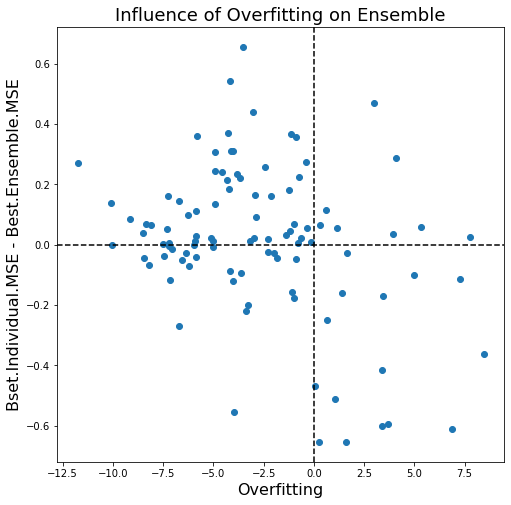

In [18]:
# Visualization 1: overfitting and ensemble.
overfitting_plot(overfitting, out_best_report)

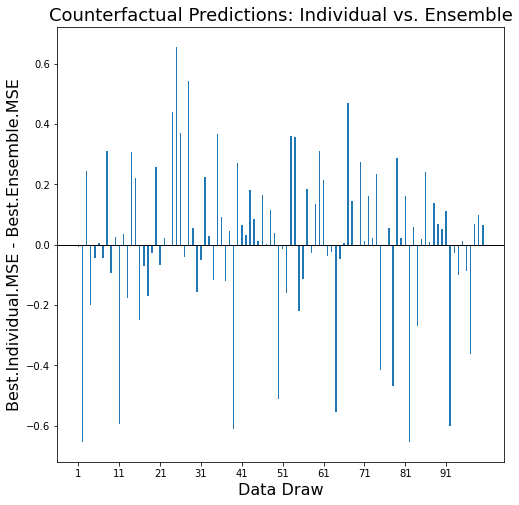

In [19]:
# Visualization 2: ensemble better?
ensemble_gap_plot(out_best_report)

## Store some variables for usage in notebook 05 and 06

In [20]:
%%capture
%store out_best_report
%store counter_en_dict
%store nonnegative

Click here to go to [06 Visualization and generating report](06%20Visualization%20and%20generating%20report.ipynb)